# Import Raw Data

In [2]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as file:
        reader = unicodecsv.DictReader(file)
        return list(reader)

raw_data = read_csv('survey_results_raw_column_updated.csv')

In [3]:
raw_data[0]

{u'Timestamp': u'2017/07/04 4:04:48 AM GMT+1',
 u'age': u'28',
 u'branch_assoc': u'Yes',
 u'campus_job': u'Yes',
 u'cgpa': u'7 to 8',
 u'council_or_fest': u'Yes',
 u'course': u'Electrical and Electronic Engineering',
 u'gender': u'Male',
 u'graduation': u'2013',
 u'job_sat': u'7',
 u'risk_appetite': u'Would have been more than what I had',
 u'second_degree': u'No',
 u'second_degree_field': u'',
 u'student_club': u'Yes',
 u'student_club_post': u'Yes',
 u'time_acad': u'I would have spent more time than I did',
 u'time_eca': u'I would have spent the same amount of time that I did',
 u'time_experiment': u'Would have spent more time applying/experimenting',
 u'time_social': u'I would have spent the same amount of time that I did',
 u'work_field': u'Data analytics',
 u'workex': u'4'}

In [4]:
len(raw_data)

118

# Input value alteration functions

In [5]:
# A function to convert Yes to 1 and No to 2
def convert_yes_no(my_list, value):
    if my_list[value] == "Yes":
        my_list[value] = 1
    elif my_list[value] == "No":
        my_list[value] = 2

# A function to convert text based answer to short forms
def convert_text(my_list, value, short_text):
    my_list[value] = short_text

# Alter input values
Altering some input values for ease of analysis

In [6]:
for entry in raw_data:
    convert_yes_no(entry, "branch_assoc")
    convert_yes_no(entry, "campus_job")
    convert_yes_no(entry, "council_or_fest")
    convert_yes_no(entry, "student_club")
    convert_yes_no(entry, "student_club_post")
    convert_yes_no(entry, "second_degree")
    
    # Changing course to short form
    if entry["course"] == "Mechanical Engineering":
        convert_text(entry, "course", "mech")
    elif entry["course"] == "Chemical Engineering":
        convert_text(entry, "course", "chem")
    elif entry["course"] == "Electrical and Electronic Engineering":
        convert_text(entry, "course", "eee")
    elif entry["course"] == "Metallurgy and Materials Engineering":
        convert_text(entry, "course", "meta")
    elif entry["course"] == "Computer Science and Engineering":
        convert_text(entry, "course", "cse")
    elif entry["course"] == "Civil Engineering":
        convert_text(entry, "course", "civil")
    elif entry["course"] == "Electronics and Communication Engineering":
        convert_text(entry, "course", "ece")
    elif entry["course"] == "Bio Technology":
        convert_text(entry, "course", "biot")
        
    # converting time spent on various activities to numerical values for regression
    # less = 1
    # same = 2
    # more = 3
    
    if entry["time_acad"] == "I would have spent less time than I did":
        convert_text(entry, "time_acad", 1)
    elif entry["time_acad"] == "I would have spent the same amount of time that I did":
        convert_text(entry, "time_acad", 2)
    elif entry["time_acad"] == "I would have spent more time than I did":
        convert_text(entry, "time_acad", 3)
        
    if entry["time_eca"] == "I would have spent less time than I did":
        convert_text(entry, "time_eca", 1)
    elif entry["time_eca"] == "I would have spent the same amount of time that I did":
        convert_text(entry, "time_eca", 2)
    elif entry["time_eca"] == "I would have spent more time than I did":
        convert_text(entry, "time_eca", 3)
    
    if entry["time_social"] == "I would have spent less time than I did":
        convert_text(entry, "time_social", 1)
    elif entry["time_social"] == "I would have spent the same amount of time that I did":
        convert_text(entry, "time_social", 2)
    elif entry["time_social"] == "I would have spent more time than I did":
        convert_text(entry, "time_social", 3)
    
    if entry["risk_appetite"] == "Would have been lesser than what I had":
        convert_text(entry, "risk_appetite", 1)
    elif entry["risk_appetite"] == "Would have been the same that I had":
        convert_text(entry, "risk_appetite", 2)
    elif entry["risk_appetite"] == "Would have been more than what I had":
        convert_text(entry, "risk_appetite", 3)
    
    if entry["time_experiment"] == "Would have spent less time applying/experimenting":
        convert_text(entry, "time_experiment", 1)
    elif entry["time_experiment"] == "Would have spent the same amount of time as academics":
        convert_text(entry, "time_experiment", 2)
    elif entry["time_experiment"] == "Would have spent more time applying/experimenting":
        convert_text(entry, "time_experiment", 3)
    
    # Converting Gender into numeric values
    # Female = 1
    # Male = 2
    if entry["gender"] == "Female":
        convert_text(entry, "gender", 1)
    elif entry["gender"] == "Male":
        convert_text(entry, "gender", 2)
        
    # Converting CGPA into five groups
    # <6
    # 6 to 7
    # 7 to 8
    # 8 to 9
    # >9
    if entry["cgpa"] == "<6":
        convert_text(entry, "cgpa", 1)
    elif entry["cgpa"] == "6 to 7":
        convert_text(entry, "cgpa", 2)
    elif entry["cgpa"] == "7 to 8":
        convert_text(entry, "cgpa", 3)
    elif entry["cgpa"] == "8 to 9":
        convert_text(entry, "cgpa", 4)
    elif entry["cgpa"] == ">9":
        convert_text(entry, "cgpa", 5)
        
    
raw_data[12] #verification

{u'Timestamp': u'2017/07/07 6:44:08 PM GMT+1',
 u'age': u'25',
 u'branch_assoc': 1,
 u'campus_job': 1,
 u'cgpa': 4,
 u'council_or_fest': 2,
 u'course': 'eee',
 u'gender': 2,
 u'graduation': u'2013',
 u'job_sat': u'7',
 u'risk_appetite': 3,
 u'second_degree': 2,
 u'second_degree_field': u'',
 u'student_club': 1,
 u'student_club_post': 1,
 u'time_acad': 3,
 u'time_eca': 2,
 u'time_experiment': 2,
 u'time_social': 2,
 u'work_field': u'Data science',
 u'workex': u'3'}

# Data type conversion functions
Below cell has functions to alter data types

In [7]:
def parse_int(num):
    if num == '':
        return None
    else:
        return int(num)
    
def parse_float(num):
    if num == '':
        return None
    else:
        return float(num)

def parse_empty_string(string):
    if string == '':
        return None
    else:
        return string
    
# More to be added    

# Data type conversions

In [8]:
for entry in raw_data:
    entry["age"] = parse_int(entry["age"])
    #entry["graduation"] = parse_int(entry["graduation"])
    entry["job_sat"] = parse_int(entry["job_sat"])
    entry["workex"] = parse_float(entry["workex"])
    entry["second_degree_field"] = parse_empty_string(entry["second_degree_field"])

raw_data[14] # verification

{u'Timestamp': u'2017/07/08 4:51:37 PM GMT+1',
 u'age': 26,
 u'branch_assoc': 2,
 u'campus_job': 1,
 u'cgpa': 3,
 u'council_or_fest': 2,
 u'course': 'eee',
 u'gender': 2,
 u'graduation': u'2013',
 u'job_sat': 8,
 u'risk_appetite': 2,
 u'second_degree': 2,
 u'second_degree_field': None,
 u'student_club': 2,
 u'student_club_post': 1,
 u'time_acad': 2,
 u'time_eca': 3,
 u'time_experiment': 2,
 u'time_social': 2,
 u'work_field': u'Data Analytics / Software Design',
 u'workex': 4.0}

# Data representation, visualization and analysis

In [27]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

age = []
graduation_year = []

for entry in raw_data:
    age.append(entry["age"])
    graduation_year.append(entry["graduation"])

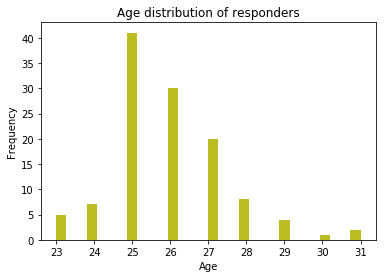

In [24]:
plt.hist(age, bins=30)
plt.title("Age distribution of responders")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [29]:
grad_year_counts = Counter(graduation_year)

grad_year_counts

Counter({u'2009': 4, u'2010': 4, u'2011': 5, u'2012': 39, u'2013': 66})

# Multiple linear regression

In [11]:
import statsmodels.api as sm
import numpy as np


/Users/krishanth/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
df = pd.DataFrame(raw_data, columns=["branch_assoc", "cgpa", "council_or_fest", "gender", "student_club", "student_club_post"])
target = pd.DataFrame(raw_data, columns=["job_sat"])

In [13]:
X = df["cgpa"]
Y = target["job_sat"]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                job_sat   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     732.8
Date:                Sun, 22 Oct 2017   Prob (F-statistic):           3.33e-52
Time:                        23:08:36   Log-Likelihood:                -287.85
No. Observations:                 118   AIC:                             577.7
Df Residuals:                     117   BIC:                             580.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cgpa           2.0856      0.077     27.070      0.000       1.933       2.238
==============================================================================
Omnibus:                        3.158   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                2.839
Skew:                          -0.200   Prob(JB):                        0.242
Kurtosis:                       3.646   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""